# Data Analysis 101

# Story?

Data on it's own doesnt provide much of the Information that may be used to figure out something...
but if the Data is analysed, then valuable Insigts can be derived form it..

We have the data <a href="">Recorded divorces in South Africa 2012</a>, now what juice can we enjoy from this Data?

lest code, analyse and find out...

In [16]:
#init_notebook_mode(connected=True)

In [20]:
#Get the Libraries

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [21]:
#Read in the Data
data = pd.read_csv(r"C:\Users\Admin\Desktop\Excel\Divorces_in_South_Africa_2012.csv")

In [22]:
#Number of Recorded Divorces_in_South_Africa_2012 
print(len(data))
data.head()
#data.describe()

21998


,MaleRace,FemaleRace,CoupleRace,MaleOccupation,FemaleOccupation,PlaintiffSex,PlaintiffOccupation,MaleStatus,FemaleStatus,MaleNoTimesMarried,...,SolemnisationCode,MarriageType,NoOfChildren,MarriageMonth,MarriageYear,SeparationMonth,SeparationYear,DivorceMonth,DivorceYear,DurationOfMarriage
0,9,9,9,2,2,1,2,1,1,1,...,2,3,1,8,1997,99,9999,2,2012,15
1,2,2,2,0,99,2,99,1,1,1,...,2,3,1,2,1992,6,2000,7,2012,20
2,1,1,1,3,99,1,3,1,1,1,...,2,3,2,9,2009,1,2010,2,2012,3
3,2,2,2,99,3,2,3,4,1,2,...,2,3,1,5,1997,5,2010,2,2012,15
4,9,9,9,7,1,1,7,1,1,1,...,2,3,0,12,2008,99,9999,4,2012,4


From printing out the data, we can see that it consists of about 21998 rows, which are the number of Recorded marriages in South Africa for that year(2012)

This is a lot of data to deal with...

# Function for finding columns data, frequency distribution 
...since we are dealing with categorical data on each column...

In [23]:

def cols_dist(col):
    male_race_freq_dist = {}
    for _ in data[col]:
        if _ not in male_race_freq_dist:
            male_race_freq_dist[_] = 1
        else:
            male_race_freq_dist[_] += 1
            
    return male_race_freq_dist
  

In [24]:
#All columns frequency distributions
columns = data.columns
cols_dists = []

for column in columns:  
    cols_dists.append(cols_dist(column))

cols_dists[0]

{1: 7679, 2: 4186, 3: 1263, 4: 7444, 5: 139, 9: 1287}

# Now that we have the distibution of each column in the dataset
we can group the distributions as we want...

In this Case we are grouping the MaleRace and FemaleRace frequency distribution, in order to answer the Question
-  which race is most frequent or rather wich race had most divorces(recorded) both on male and female in 2012?

In [25]:

#new_data_frame =  pd.DataFrame([], index = ['Male', 'Female'] , columns = cols_dist('MaleRace').keys())
new_data_frame =  pd.DataFrame([], index = cols_dist('MaleRace').keys(), columns = ['Male', 'Female'] )
new_data_frame.Male = cols_dists[0].values()
new_data_frame.Female = cols_dists[1].values()

#new_data_frame.loc['Male'] = [n for n in cols_dists[0].values()]
#new_data_frame.loc['Female'] = [n for n in cols_dists[1].values()]

new_data_frame

,Male,Female
9,1287,1402
2,4186,4359
1,7679,7661
5,139,49
3,1263,7377
4,7444,1150


# Customization....

Because we want to add some descriptiveness to our data...we customize it (Domain Specific Knowledge)

For our data we have a manual for describing the data which can be found here 
<a href="https://data.code4sa.org/Government/Divorces-in-South-Africa-2012/f47a-ghee">Divorce Data</a>
    
The manual describes the Categoies of Race as follow:
    1 - Black African, 
    2 - Coloured, 
    3 - Indian/Asian, 
    4 - White, 
    5 - Mixed, 
    9 - Unspecified

In [27]:
# - Update the new data with discriptiveness
new_data_frame.index = ['Unspecified','Coloured','Black African','Mixed','Indian/Asian','White']

new_data_frame

,Male,Female
Unspecified,1287,1402
Coloured,4186,4359
Black African,7679,7661
Mixed,139,49
Indian/Asian,1263,7377
White,7444,1150


# Visualize...
We can do the math to compare both Male and Female Race and find a Max, 
then compare that max to the other max's of other instances then we will have our answer
but a plot would do us better...

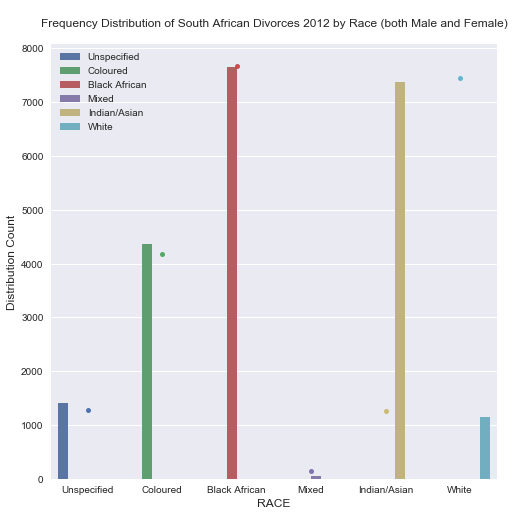

In [9]:
plt.figure(figsize=(8,8))
sns.swarmplot( x = new_data_frame.index,
               y = new_data_frame['Male'])


sns.barplot( x = new_data_frame.index,
             y = new_data_frame['Female'], hue = new_data_frame.index)

plt.title('\nFrequency Distribution of South African Divorces 2012 by Race (both Male and Female)\n')
plt.xlabel('RACE', fontsize = 12)
plt.ylabel('Distribution Count', fontsize = 12)


plt.show()

In [10]:
#Now do a new Data Frame wich consists only of the Frequecy distributins
columns = list(data.columns) 

In [25]:
import sys
import glob
import serial


def serial_ports():
    """ Lists serial port names

        :raises EnvironmentError:
            On unsupported or unknown platforms
        :returns:
            A list of the serial ports available on the system
    """
    if sys.platform.startswith('win'):
        ports = ['COM%s' % (i + 1) for i in range(256)]
    elif sys.platform.startswith('linux') or sys.platform.startswith('cygwin'):
        # this excludes your current terminal "/dev/tty"
        ports = glob.glob('/dev/tty[A-Za-z]*')
    elif sys.platform.startswith('darwin'):
        ports = glob.glob('/dev/tty.*')
    else:
        raise EnvironmentError('Unsupported platform')

    result = []
    for port in ports:
        try:
            s = serial.Serial(port)
            s.close()
            result.append(port)
        except (OSError, serial.SerialException):
            pass
    return result

In [26]:
serial_ports()


['COM1']